In [90]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random
import os
import glob

In [91]:
path = '../../data/fits'
files_name = glob.glob(os.path.join(path, "*.fits"))

In [125]:
data_i = 0
fits_file = files_name[data_i]
hdu_list = fits.open(fits_file)
hdu_list.info()
# hdu_list.close()

Filename: ../../data/fits\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1027   ()      
  1  SCI           1 ImageHDU        83   (5810, 5802)   float32   
  2  WHT           1 ImageHDU        44   (5810, 5802)   float32   
  3  CTX           1 ImageHDU        37   (5810, 5802)   int32   
  4  HDRTAB        1 BinTableHDU    638   16R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D

In [126]:
image_data = hdu_list['SCI'].data

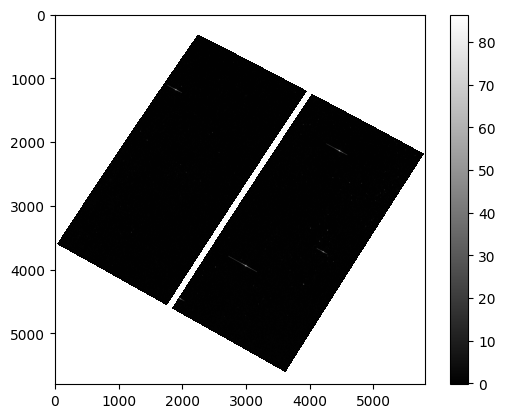

In [127]:
plt.imshow(image_data, cmap='gray')
# plt.imshow(image_data, cmap='gray')
plt.colorbar()

# FITS to JPG

In [95]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import cv2
import numpy as np

In [96]:
def apply_filter(im, fil):
    # Apply particular filter to image
        # im = im / 255.
        filter_name = fil
        if filter_name == "Linear":
            im = im
        elif filter_name == "Log":
            im = (np.log(1000 * im + 1)) / (np.log(1000))
        elif filter_name == "Power":
            im = (np.power(1000, im) - 1) / 1000
        elif filter_name == "Sqrt":
            im = np.sqrt(im)
        elif filter_name == "Squared":
            im = np.square(im)
        elif filter_name == "ASINH":
            im = (np.arcsinh(10*im)) / 3
        elif filter_name == "SINH":
            im = (np.sinh(10*im)) / 3
        else:
            raise

        
        return im

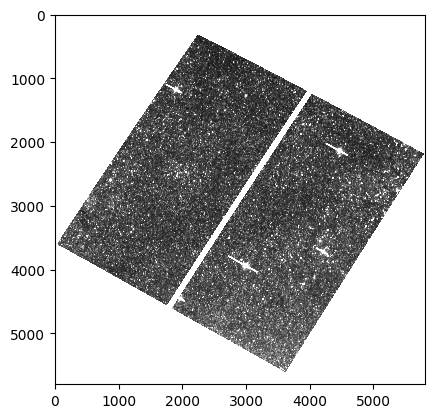

In [97]:
z = ZScaleInterval()
z1,z2 = z.get_limits(image_data)
plt.figure()
plt.imshow(image_data, vmin=z1, vmax=z2, cmap='gray')

In [98]:
zscale = ZScaleInterval()

Text(0.5, 1.0, 'After renormalize')

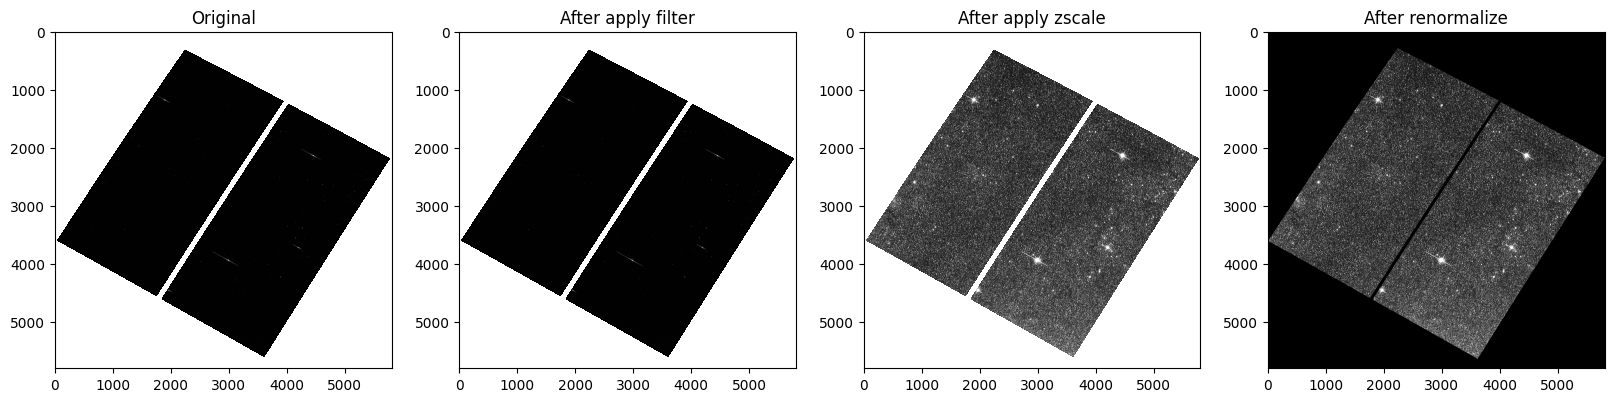

In [99]:
before_apply = image_data
after_apply_filter = apply_filter(image_data, "Linear")
after_apply_zscale = zscale(after_apply_filter)
# normalize image back to 0-255
after_renormalize = after_apply_zscale * 255
after_renormalize = after_renormalize.astype(np.uint16)
x = after_renormalize

# plot 4 images
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(before_apply, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(after_apply_filter, cmap='gray')
ax[1].set_title('After apply filter')
ax[2].imshow(after_apply_zscale, cmap='gray')
ax[2].set_title('After apply zscale')
ax[3].imshow(after_renormalize, cmap='gray')
ax[3].set_title('After renormalize')

In [100]:
# display statistics of the image compared with the original, after applying filter and after applying zscale and renormalize
print('Original image statistics: min = {}, max = {}, mean = {}'.format(before_apply.min(), before_apply.max(), before_apply.mean()))
print('After apply filter image statistics: min = {}, max = {}, mean = {}'.format(after_apply_filter.min(), after_apply_filter.max(), after_apply_filter.mean()))
print('After apply zscale image statistics: min = {}, max = {}, mean = {}'.format(after_apply_zscale.min(), after_apply_zscale.max(), after_apply_zscale.mean()))
print('After renormalize image statistics: min = {}, max = {}, mean = {}'.format(after_renormalize.min(), after_renormalize.max(), after_renormalize.mean()))

Original image statistics: min = nan, max = nan, mean = nan
After apply filter image statistics: min = nan, max = nan, mean = nan
After apply zscale image statistics: min = nan, max = nan, mean = nan
After renormalize image statistics: min = 0, max = 255, mean = 32.88232124835581


In [170]:
def pipeline_target_filters(im, fil):
    # Apply particular filter to image
        # im = im / 255.
        filter_name = fil
        if filter_name == "Linear":
            im = np.interp(im, [0, 1], (0, 255))
        elif filter_name == "Log":
            im = (np.log(1000 * im + 1)) / (np.log(1000))
        elif filter_name == "Power":
            im = (np.power(1000, im) - 1) / 1000
        elif filter_name == "Sqrt":
            im = np.sqrt(im)
        elif filter_name == "Squared":
            im = np.square(im)
        elif filter_name == "ASINH":
            im = (np.arcsinh(10*im)) / 3
        elif filter_name == "SINH":
            im = (np.sinh(10*im)) / 3
        else:
            print("No filter applied")

        z = ZScaleInterval()
        im = z(im)
        # normalize image back to 0-255
        im = im * 255
        im = im.astype(np.uint16)

        # these below code is to flip the image follow the original image in DS9
        im = np.flipud(im)
        im = np.flip(im, axis=0) 
        return im

Text(0.5, 1.0, 'After apply filter')

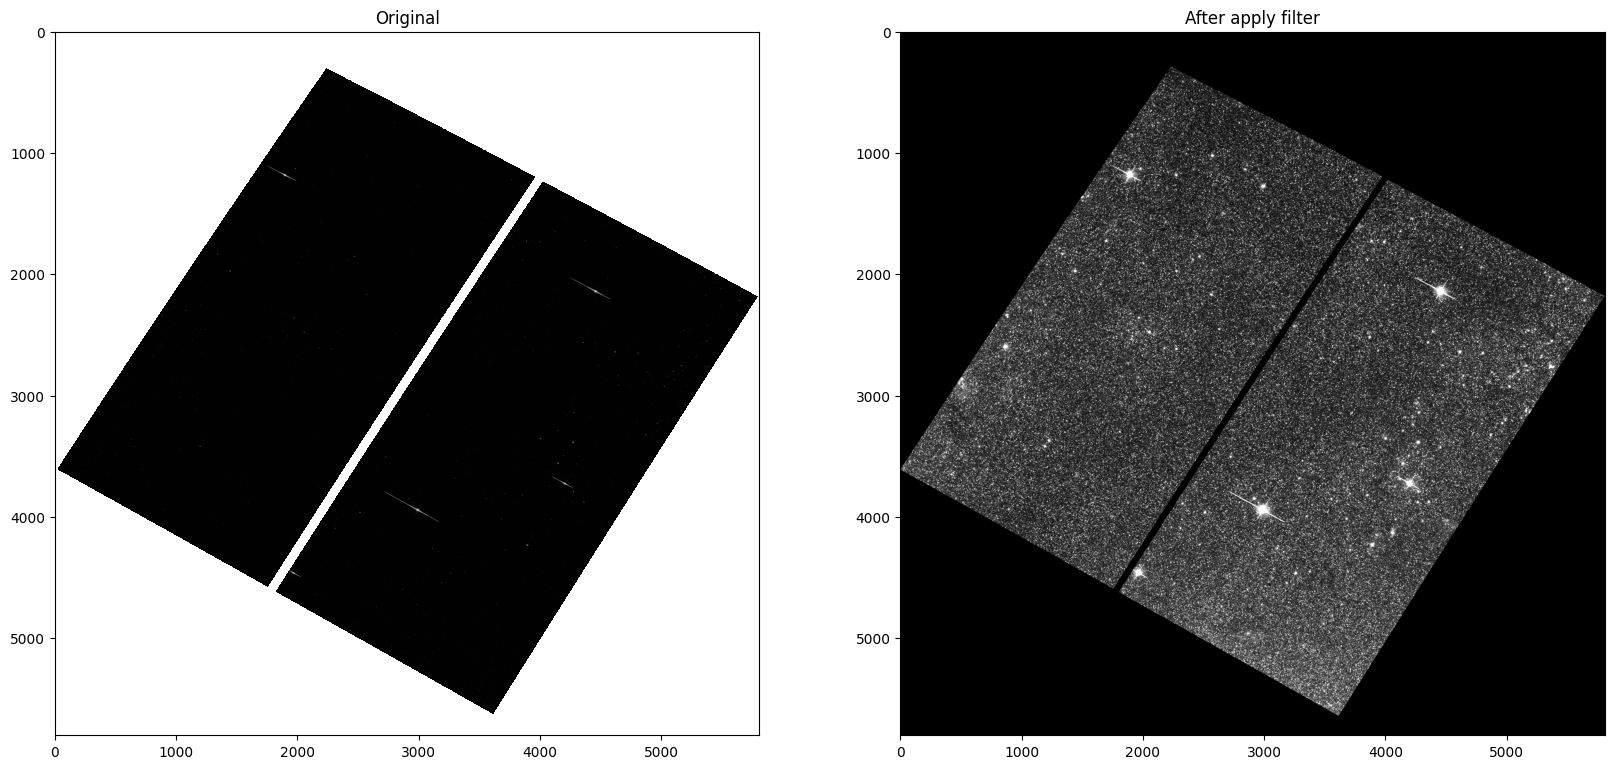

In [129]:
# test pipeline_target_filters
before_apply = image_data
after_apply_filter = pipeline_target_filters(image_data, "Linear")

# plot 2 images
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(before_apply, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(after_apply_filter, cmap='gray')
ax[1].set_title('After apply filter')


In [103]:
y = after_apply_filter
x == y

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [109]:
# display statistics of x and y
print('x image statistics: min = {}, max = {}, mean = {}'.format(x.min(), x.max(), x.mean()))
print('y image statistics: min = {}, max = {}, mean = {}'.format(y.min(), y.max(), y.mean()))

x image statistics: min = 0, max = 255, mean = 32.88232124835581
y image statistics: min = 0, max = 255, mean = 32.88232124835581


In [110]:
# free memory x and y
del x
del y

# Export the images

In [159]:
# training dataset
path_train = '../../data/fits'
files_name = glob.glob(os.path.join(path_train, "*.fits"))
files_name[0]

'../../data/fits\\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits'

In [160]:
# create new name without path file from files_name by replace .fits to .jpg
files_name_jpg = [i.split('\\')[-1].replace('.fits', '.jpg') for i in files_name]
files_name_jpg

['hst_10190_12_acs_wfc_f814w_j90o12_drc.jpg',
 'hst_10190_13_acs_wfc_f814w_j90o13_drc.jpg',
 'hst_10190_28_acs_wfc_f814w_j90o28_drc.jpg',
 'hst_14610_01_acs_wfc_f814w_jdb601_drc.jpg',
 'hst_14610_02_acs_wfc_f814w_jdb602_drc.jpg',
 'hst_14610_08_acs_wfc_f814w_jdb608_drc.jpg',
 'hst_14610_12_acs_wfc_f814w_jdb612_drc.jpg',
 'hst_14610_18_acs_wfc_f814w_jdb618_drc.jpg',
 'hst_14610_23_acs_wfc_f814w_jdb623_drc.jpg',
 'hst_14610_26_acs_wfc_f814w_jdb626_drc.jpg',
 'hst_14610_27_acs_wfc_f814w_jdb627_drc.jpg',
 'hst_14610_30_acs_wfc_f814w_jdb630_drc.jpg',
 'hst_14610_32_acs_wfc_f814w_jdb632_drc.jpg',
 'hst_14610_40_acs_wfc_f814w_jdb640_drc.jpg',
 'hst_14610_44_acs_wfc_f814w_jdb644_drc.jpg',
 'hst_14610_47_acs_wfc_f814w_jdb647_drc.jpg',
 'hst_14610_50_acs_wfc_f814w_jdb650_drc.jpg',
 'hst_16274_54_acs_wfc_f814w_je9t54_drc.jpg',
 'hst_9873_03_acs_wfc_f814w_j8re03_drc.jpg',
 'hst_9873_06_acs_wfc_f814w_j8re06_drc.jpg']

In [206]:
# the image is saved in the same old resolution = len data in numpy array and display the image by flip vertical with inverte y-axis
def save_image(data, path_save, filter_name, image_name, save_mode=None):

    # align the code 
    ''' # if path exists then create new folder
    if not os.path.exists(path_save):
        os.makedirs(path_save)
    # save image
    plt.savefig(path_save + image_name)
    # close figure
    plt.close()'''

    # save image if path exists then create new folder
    if not os.path.exists(path_save + filter_name):
        os.makedirs(path_save + filter_name)
    elif not os.path.exists(path_save + filter_name + '/Testing'):
        os.makedirs(path_save + filter_name + '/Testing')
    
    if save_mode == 'train':
        # save image
        plt.imsave(path_save + filter_name + '/' + image_name, data, cmap='gray')
        # close figure
        plt.close()
    elif save_mode == 'test':
        # save image
        plt.imsave(path_save + filter_name + '/Testing/' + image_name, data, cmap='gray')
        # close figure
        plt.close()

## Export training images

In [161]:
export_path = '../../data/jpg/ds9_format/'

In [167]:
# save the image by named with the file name by with out .fits
filter_list = ['Linear', 'Log', 'Power', 'Sqrt', 'Squared', 'ASINH', 'SINH']
for filter in filter_list:
    print('processing in {} filter ...'.format(filter))
    for i in range(len(files_name)):

        fits_file = files_name[i]
        data = fits.getdata(fits_file)

        data = pipeline_target_filters(data, filter)
        
        save_image(data, export_path, filter, files_name_jpg[i], save_mode='train')
    print('Done!')

processing in Linear fillter ...
Done!
processing in Log fillter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


Done!
processing in Power fillter ...
Done!
processing in Sqrt fillter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


Done!
processing in Squared fillter ...
Done!
processing in ASINH fillter ...
Done!
processing in SINH fillter ...
Done!


## Export testing images

In [208]:
# testing dataset
path_test = '../../data/fits/testing_set'
test_name = glob.glob(os.path.join(path_test, "*.fits"))
test_name

['../../data/fits/testing_set\\hst_14610_07_acs_wfc_f814w_jdb607_drc.fits',
 '../../data/fits/testing_set\\hst_14610_13_acs_wfc_f814w_jdb613_drc.fits',
 '../../data/fits/testing_set\\hst_14610_15_acs_wfc_f814w_jdb615_drc.fits',
 '../../data/fits/testing_set\\hst_14610_20_acs_wfc_f814w_jdb620_drc.fits',
 '../../data/fits/testing_set\\hst_14610_24_acs_wfc_f814w_jdb624_drc.fits',
 '../../data/fits/testing_set\\hst_14610_51_acs_wfc_f814w_jdb651_drc.fits']

In [209]:
# create new name without path file from files_name by replace .fits to .jpg
files_name_test = [i.split('\\')[-1].replace('.fits', '.jpg') for i in test_name]
files_name_test

['hst_14610_07_acs_wfc_f814w_jdb607_drc.jpg',
 'hst_14610_13_acs_wfc_f814w_jdb613_drc.jpg',
 'hst_14610_15_acs_wfc_f814w_jdb615_drc.jpg',
 'hst_14610_20_acs_wfc_f814w_jdb620_drc.jpg',
 'hst_14610_24_acs_wfc_f814w_jdb624_drc.jpg',
 'hst_14610_51_acs_wfc_f814w_jdb651_drc.jpg']

In [210]:
# save the image by named with the file name by with out .fits
filter_list = ['Linear', 'Log', 'Power', 'Sqrt', 'Squared', 'ASINH', 'SINH']
for filter in filter_list:
    print('processing in {} filter ...'.format(filter))
    for i in range(len(files_name_test)):

        fits_file = test_name[i]
        data = fits.getdata(fits_file)

        data = pipeline_target_filters(data, filter)
        
        save_image(data, export_path, filter, files_name_test[i], save_mode='test')
    print('Done!')

processing in Linear filter ...
Done!
processing in Log filter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


Done!
processing in Power filter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == "":


Done!
processing in Sqrt filter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


Done!
processing in Squared filter ...
Done!
processing in ASINH filter ...
Done!
processing in SINH filter ...


C:\Users\news1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in sinh


Done!
